운동 동작을 촬영한 이미지이다 보니 흔들림이 들어간 영상(특히 손발같은 말단 부)이 많고, 이 부분에서 예측 성능이 떨어진다.

클래식한 흔들림 보정 기법으로 해결해서 성능 향상을 보자

---

TODO: 키포인트 예측할 때 뭔가로 가려진 부분을 이어내는 성능이 떨어짐.  

이 부분을 augmentation으로 해결할 수 없을까?

---

In [1]:
%load_ext lab_black

In [4]:
import math
import os
import random
import shutil
import json
import logging
import sys
from collections import defaultdict
from datetime import datetime
from io import TextIOWrapper
from pathlib import Path
from typing import Callable, List, Sequence, Tuple

import albumentations as A
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import KFold
from torch import nn, optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, Dataset, Subset
from torch.utils.tensorboard import SummaryWriter
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from tqdm import tqdm
from PIL import Image

import utils
import networks
from error_list import error_list

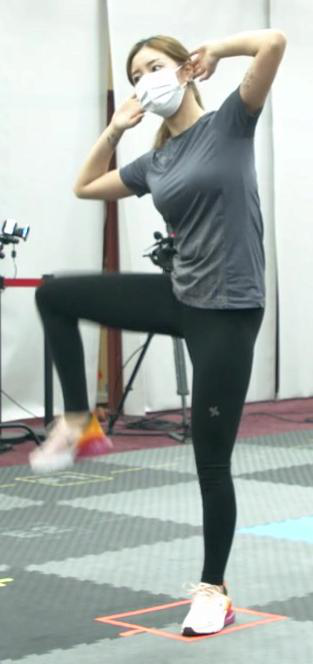

In [9]:
img = imageio.imread("data/box_effdet/train_imgs/001-1-1-01-Z17_D-0000013.jpg")
Image.fromarray(img)

다리가 흔들린 것을 볼 수 있음

---

## saturate_cast

In [8]:
sharpening_1 = np.array(
    [
        [-1, -1, -1],
        [-1, 9, -1],
        [-1, -1, -1],
    ]
)
sharpening_2 = (
    np.array(
        [
            [-1, -1, -1, -1, -1],
            [-1, 2, 2, 2, -1],
            [-1, 2, 9, 2, -1],
            [-1, 2, 2, 2, -1],
            [-1, -1, -1, -1, -1],
        ]
    )
    / 9.0
)

In [10]:
out1 = cv2.filter2D(img, -1, sharpening_1)

In [11]:
out2 = cv2.filter2D(img, -1, sharpening_2)

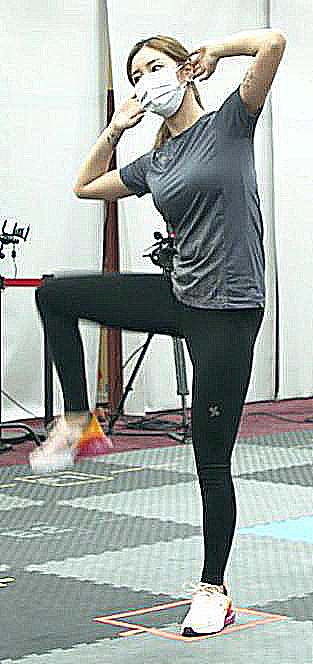

In [12]:
Image.fromarray(out1)

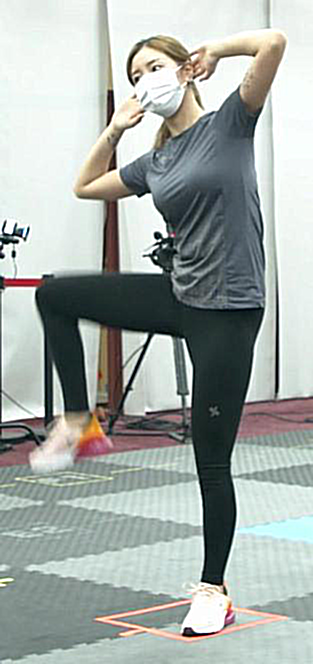

In [13]:
Image.fromarray(out2)